
<div class="alert alert-success" style = "border-radius:10px;border-width:3px;border-color:white;font-family:Verdana,sans-serif;font-size:16px;">
<h2>Evaluation Baseline Model</h2>

In this Jupyter notebook, we start by retrieving the original dataset and the predicted output from the baseline model, both of which are stored in a .csv format. The initial step involves sorting both DataFrames to align them in the same order. Subsequently, we calculate the four metrics described in this thesis: Precision, Recall, F1-Score, and the Matthews Correlation Coefficient. Also, the ratios of '1's have been calculated. These calculations are performed both for each individual component and for the overall dataset. 

Additionally, to facilitate a deeper understanding of the outputs, the notebook includes the creation of bar charts and heatmaps. These visual representations are instrumental in providing a more comprehensive analysis and interpretation of the results.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, matthews_corrcoef
import numpy as np

In [5]:
def transform_df(df_sheet):
    
    columns_to_drop = ['Interlocutor', 'Unnamed: 1']

    # Drop the specified columns
    df_sheet = df_sheet.drop(columns=columns_to_drop)
    # Drop the specified row (index 0)
    df_sheet = df_sheet.drop(index=0)
    df_subset = df_sheet.loc[0:30]
    transposed_df_sheet = df_subset.T
    transposed_df_sheet=transposed_df_sheet.reset_index(drop=True)
    columns_to_drop = [2, 5, 8, 19, 26]
    transposed_df_sheet=transposed_df_sheet.drop(columns=columns_to_drop)
    transposed_df_sheet.shape
    # Rename columns using the list
    columns_list_sheet = ['File', 'component_1', 'component_2', 'component_3',
                           'component_4', 'component_5', 'component_6', 'component_7',
                           'component_8', 'component_9', 'component_10', 'component_11',
                           'component_12', 'component_13', 'component_14', 'component_15',
                           'component_16', 'component_17', 'component_18', 'component_19',
                           'component_20', 'component_21', 'component_22', 'component_23', 'component_24']
    transposed_df_sheet.columns = columns_list_sheet
    return transposed_df_sheet

In [6]:
# Read sheets by index (0-based)
sheets_to_read = [0, 1]
dfjulio = pd.read_excel("../Valoració_Julio.xlsx", sheet_name=sheets_to_read)
df_sheet0_j = dfjulio[0]
df_sheet1_j = dfjulio[1]
df_sheet0_j = transform_df(df_sheet0_j)
df_sheet1_j = transform_df(df_sheet1_j)
dfsep = pd.read_excel("../Valoració_Septiembre.xlsx", sheet_name=sheets_to_read)
df_sheet0_s = dfsep[0]
df_sheet1_s = dfsep[1]
df_sheet0_s = transform_df(df_sheet0_s)
df_sheet1_s = transform_df(df_sheet1_s)

In [23]:
# Concatenate all dataframes in one step
all_dataframes = [df_sheet0_j, df_sheet0_s, df_sheet1_j, df_sheet1_s]
final_concatenated_df = pd.concat(all_dataframes, axis=0)

# Reset the index for the final dataframe
final_concatenated_df = final_concatenated_df.reset_index(drop=True)
# List of component columns to convert
components = [f'component_{i}' for i in range(1, 25)]

# Convert each component column to int
for component in components:
    final_concatenated_df[component] = final_concatenated_df[component].astype(int)

In [114]:
df = pd.read_csv("output_results_baseline_model.csv")
df["File"] = df["File"].str.replace('.txt', '')
# Convert the "Result" column to a list of integers for every row
df['Result'] = df['Result'].apply(lambda x: ast.literal_eval(x))
# Create a DataFrame with each component in a separate column
df_components = pd.DataFrame(df['Result'].to_list(), columns=[f'component_{i+1}' for i in range(len(df['Result'].iloc[0]))])
# Concatenate the DataFrames
result_df = pd.concat([df['File'], df_components], axis=1)

In [115]:
filtered_df = final_concatenated_df[final_concatenated_df['File'].isin(result_df['File'])]

Sort the original dataset and the predicted in the same order to easily comparison

In [116]:
filtered_df_aligned = filtered_df.sort_values('File')
result_df_aligned = result_df.sort_values('File')

In [121]:
components = [f'component_{i}' for i in range(1, 25)]

# Initialize lists to store the metrics for each component
precisions = []
recalls = []
f1_scores = []
mcc_scores = []

global_true_labels = []
global_predicted_labels = []
# Calculating metrics for each component
for component in components:
    true_labels = filtered_df_aligned[component].values
    predicted_labels = result_df_aligned[component].values
    global_true_labels.extend(true_labels)
    global_predicted_labels.extend(predicted_labels)

    precisions.append(precision_score(true_labels, predicted_labels))
    recalls.append(recall_score(true_labels, predicted_labels))
    f1_scores.append(f1_score(true_labels, predicted_labels))
    mcc_scores.append(matthews_corrcoef(true_labels, predicted_labels))

# Now calculate the global metrics using the concatenated arrays
global_precision = precision_score(global_true_labels, global_predicted_labels)
global_recall = recall_score(global_true_labels, global_predicted_labels)
global_f1 = f1_score(global_true_labels, global_predicted_labels)
global_mcc = matthews_corrcoef(global_true_labels, global_predicted_labels)

print("Metrics for each component:")
for i, component in enumerate(components):
    print(f"{component} - Precision: {precisions[i]}, Recall: {recalls[i]}, F1-Score: {f1_scores[i]}, Matthews Correlation Coefficient: {mcc_scores[i]}")

print("\nGlobal Metrics:")
print(f"Global Precision: {global_precision}")
print(f"Global Recall: {global_recall}")
print(f"Global F1-Score: {global_f1}")
print(f"Global Matthews Correlation Coefficient: {global_mcc}")

Metrics for each component:
component_1 - Precision: 0.9195402298850575, Recall: 0.9876543209876543, F1-Score: 0.9523809523809523, Matthews Correlation Coefficient: -0.03151714605173197
component_2 - Precision: 0.6785714285714286, Recall: 0.9661016949152542, F1-Score: 0.7972027972027973, Matthews Correlation Coefficient: 0.07913281348990076
component_3 - Precision: 0.7294117647058823, Recall: 0.9538461538461539, F1-Score: 0.8266666666666667, Matthews Correlation Coefficient: -0.11175279765091087
component_4 - Precision: 0.5113636363636364, Recall: 1.0, F1-Score: 0.6766917293233083, Matthews Correlation Coefficient: 0.0
component_5 - Precision: 1.0, Recall: 0.9545454545454546, F1-Score: 0.9767441860465117, Matthews Correlation Coefficient: 0.0
component_6 - Precision: 0.9240506329113924, Recall: 0.8902439024390244, F1-Score: 0.9068322981366461, Matthews Correlation Coefficient: -0.09130118369370445
component_7 - Precision: 0.8064516129032258, Recall: 0.684931506849315, F1-Score: 0.74074

In [99]:
# Function to plot bar charts
def plot_bar_chart(metrics, title, ylabel):
    plt.figure(figsize=(15, 8))
    plt.bar(components, metrics, color='skyblue')
    plt.xlabel('Components')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.savefig('ratio_of_1s_components_.png')
    plt.show()


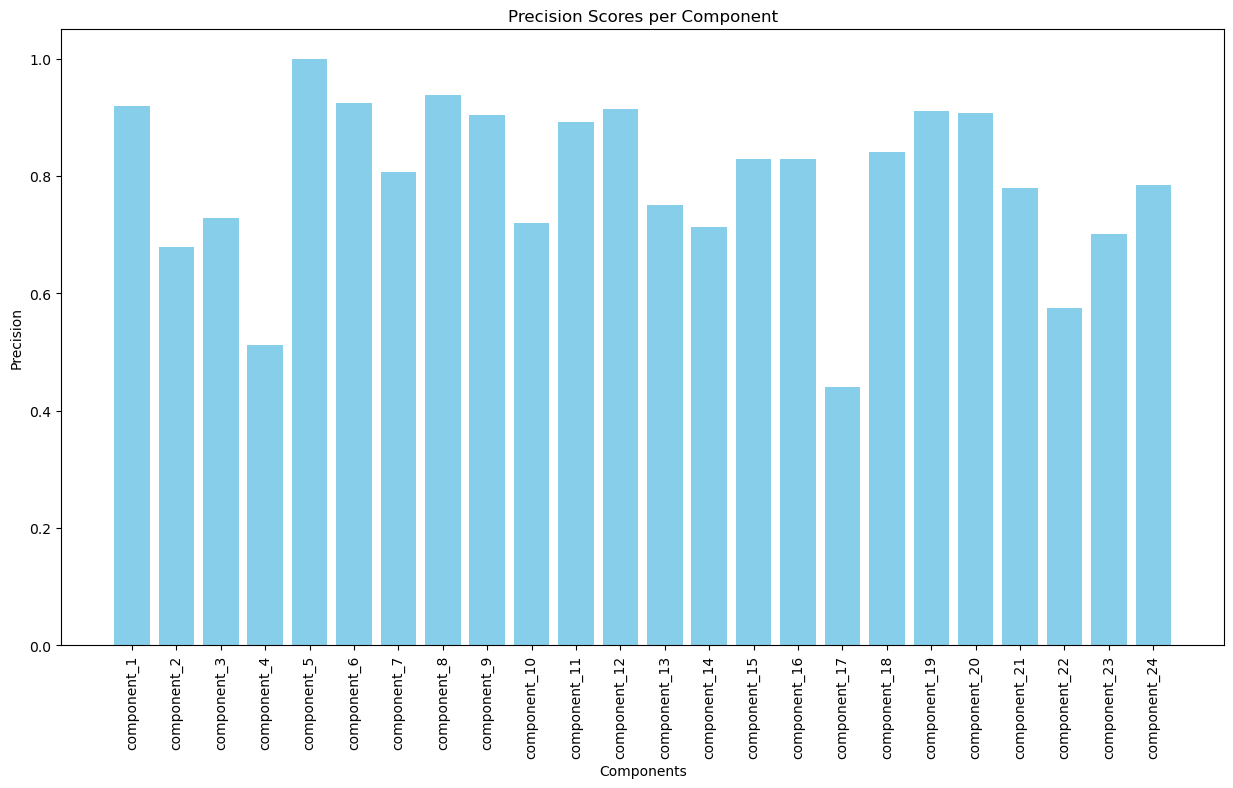

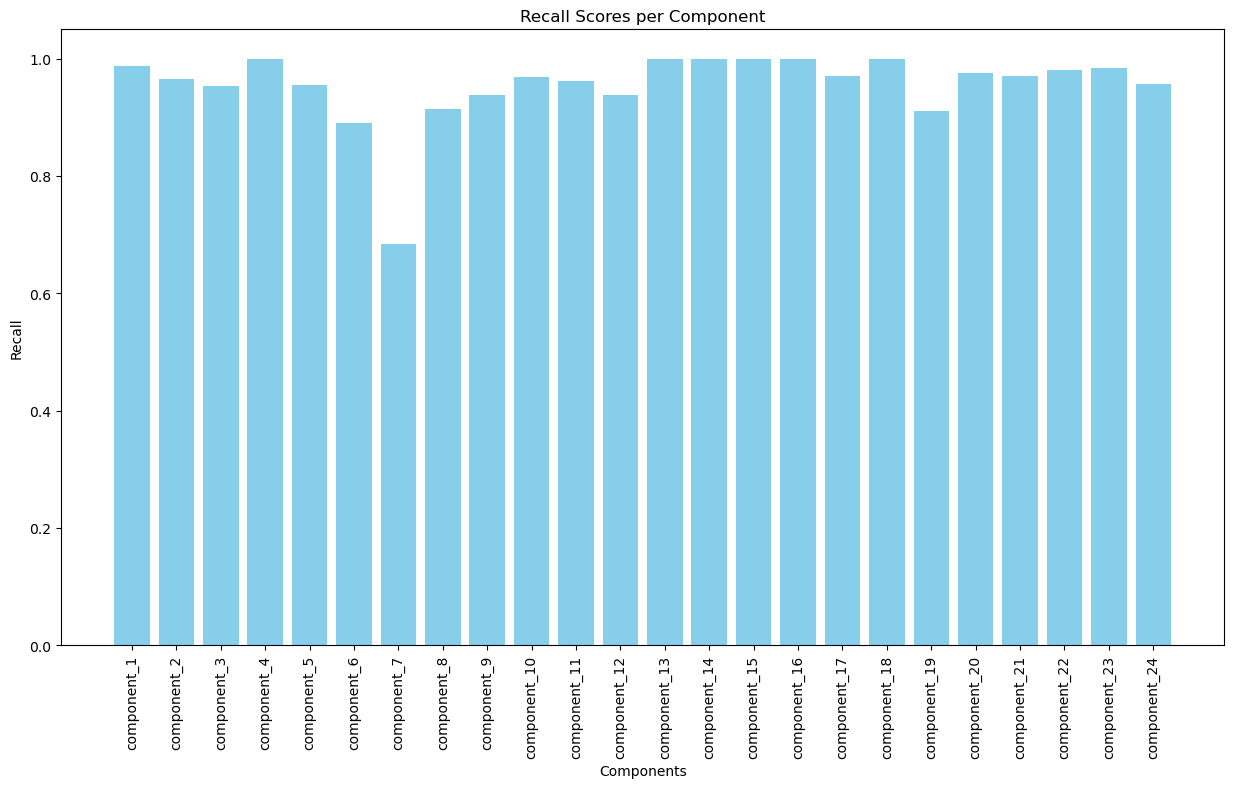

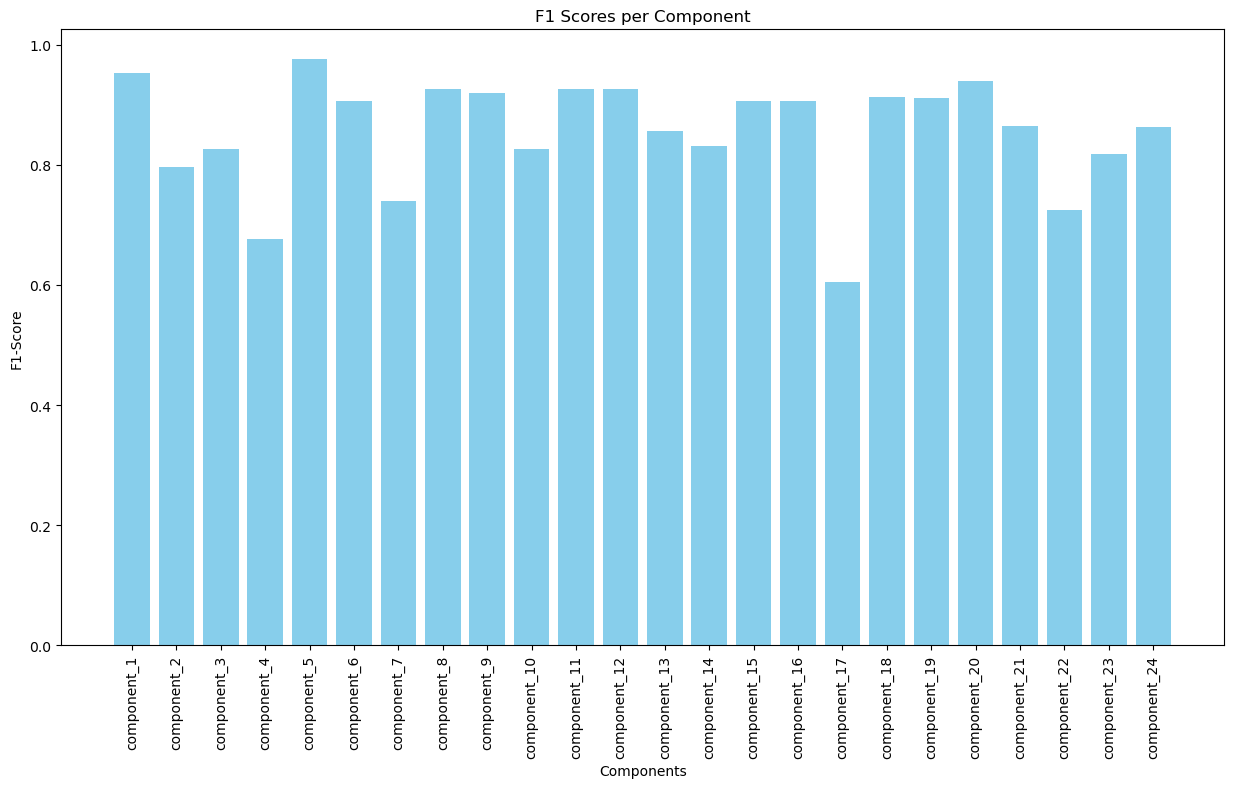

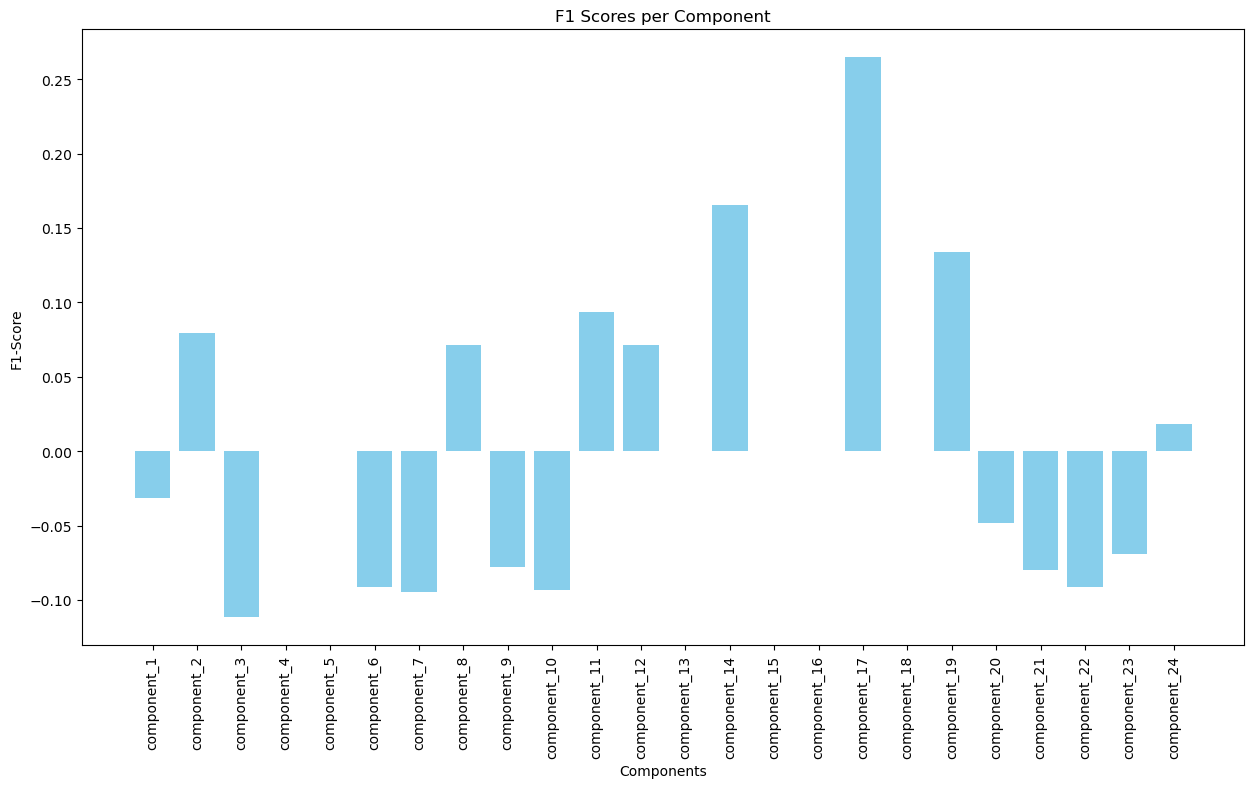

In [100]:
# Plotting bar charts for Precision, Recall, and F1-Score
plot_bar_chart(precisions, 'Precision Scores per Component', 'Precision')
plot_bar_chart(recalls, 'Recall Scores per Component', 'Recall')
plot_bar_chart(f1_scores, 'F1 Scores per Component', 'F1-Score')
plot_bar_chart(mcc_scores, 'F1 Scores per Component', 'F1-Score')

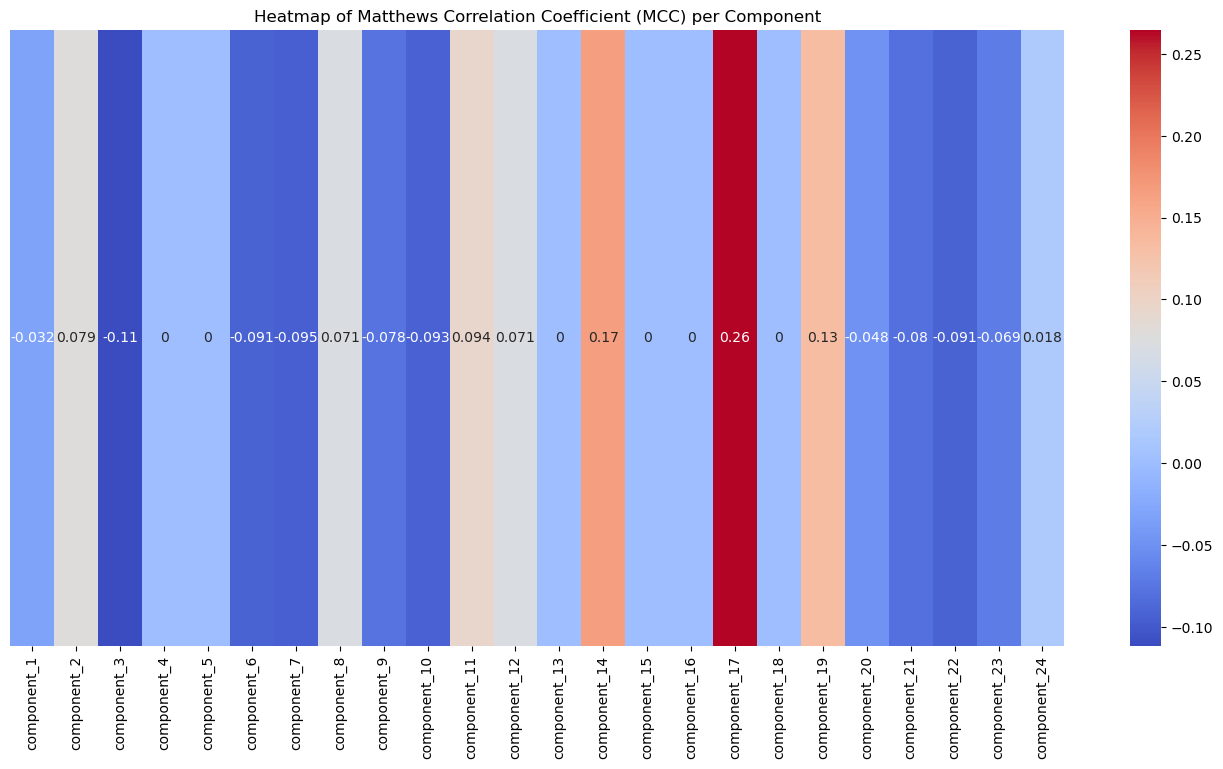

In [96]:
# Heatmap for Matthews Correlation Coefficient (MCC)
plt.figure(figsize=(17, 8))
sns.heatmap([mcc_scores], annot=True, cmap='coolwarm', xticklabels=components)
plt.title('Heatmap of Matthews Correlation Coefficient (MCC) per Component')
plt.yticks([])
plt.show()

In [127]:
# Initialize counter for 1s
total_count_1s = 0
total_predictions = 0

# Summing up the count of 1s and total predictions from all components
for component in components:
    predicted_labels = result_df_aligned[component].values
    total_count_1s += np.count_nonzero(predicted_labels == 1)
    total_predictions += len(predicted_labels)

# Calculating the ratio of 1s to total predictions
ratio_of_1s = total_count_1s / total_predictions if total_predictions != 0 else 0
print(total_count_1s)
# Print the ratio of 1s to total predictions
print(f"Ratio of 1s to total predictions across all components: {ratio_of_1s}")

2007
Ratio of 1s to total predictions across all components: 0.9502840909090909


In [98]:
# Initialize a list to store the ratio for each component
ratios_per_component = []

# Calculating the ratio of 1s to total predictions for each component
for component in components:
    predicted_labels = result_df_aligned[component].values
    count_1s = np.count_nonzero(predicted_labels == 1)
    total_predictions = len(predicted_labels)

    # Calculate the ratio for this component
    ratio = count_1s / total_predictions if total_predictions != 0 else 0
    ratios_per_component.append(ratio)

# Print the ratio for each component
print("Ratio of 1s to total predictions for each component:")
for i, component in enumerate(components):
    print(f"{component} - Ratio: {ratios_per_component[i]}")

Ratio of 1s to total predictions for each component:
component_1 - Ratio: 0.9886363636363636
component_2 - Ratio: 0.9545454545454546
component_3 - Ratio: 0.9659090909090909
component_4 - Ratio: 1.0
component_5 - Ratio: 0.9545454545454546
component_6 - Ratio: 0.8977272727272727
component_7 - Ratio: 0.7045454545454546
component_8 - Ratio: 0.9090909090909091
component_9 - Ratio: 0.9431818181818182
component_10 - Ratio: 0.9772727272727273
component_11 - Ratio: 0.9545454545454546
component_12 - Ratio: 0.9318181818181818
component_13 - Ratio: 1.0
component_14 - Ratio: 0.9886363636363636
component_15 - Ratio: 1.0
component_16 - Ratio: 1.0
component_17 - Ratio: 0.8522727272727273
component_18 - Ratio: 1.0
component_19 - Ratio: 0.8977272727272727
component_20 - Ratio: 0.9772727272727273
component_21 - Ratio: 0.9772727272727273
component_22 - Ratio: 0.9886363636363636
component_23 - Ratio: 0.9886363636363636
component_24 - Ratio: 0.9545454545454546


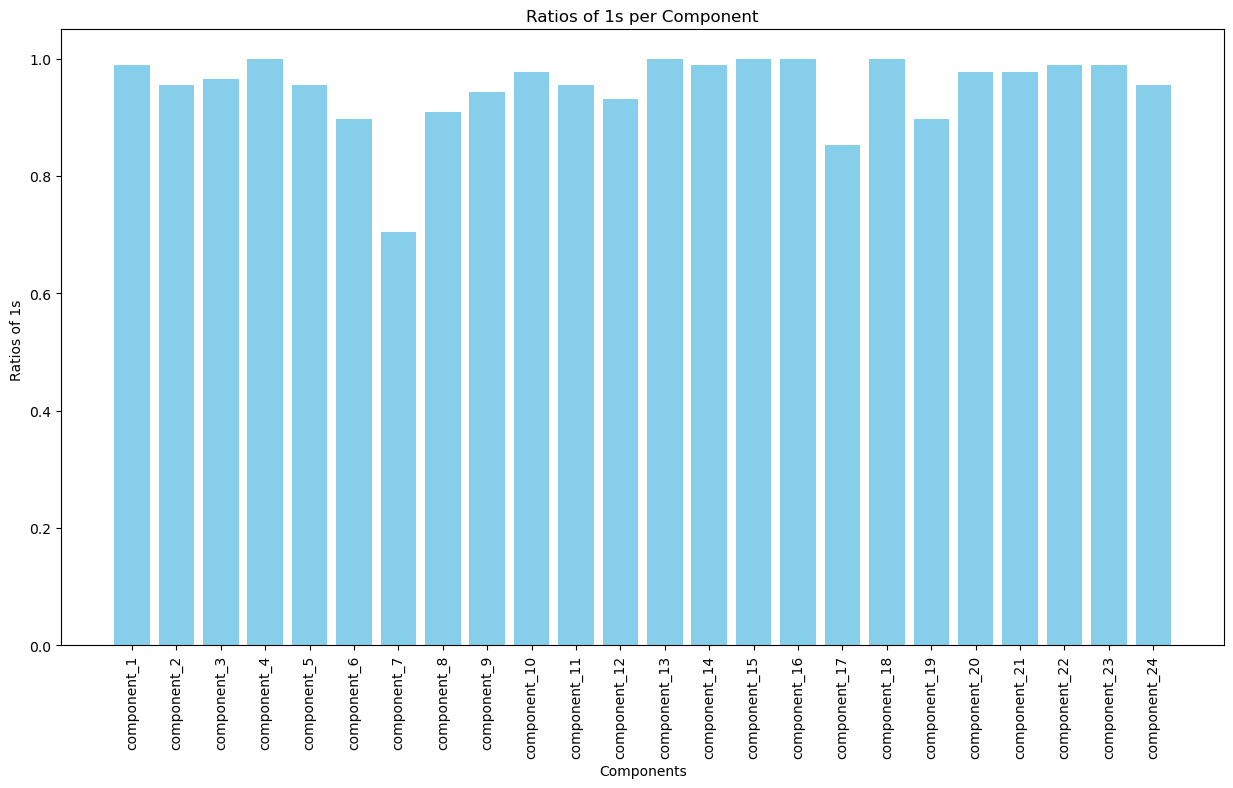

In [101]:
plot_bar_chart(ratios_per_component, 'Ratios of 1s per Component', 'Ratios of 1s ')